In [1]:
#!pip install pandas
#%matplotlib inline
import math
import numpy as np
import pandas as pd
import pandasql as ps
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import IPython.display as ipd
from tqdm.notebook import tqdm, trange
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import ast

from collections import defaultdict
from scipy.stats.stats import pearsonr

plt.rcParams['axes.formatter.useoffset']=False
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
df = pd.read_csv('flat_df_no_nulli.csv', index_col=0)

In [41]:
features = [
 'chroma_censkurtosis',
 'chroma_censmax',
 'chroma_censmean',
 'chroma_censmedian',
 'chroma_censmin',
 'chroma_censskew',
 'chroma_censstd',
 'chroma_censcqtkurtosis',
 'chroma_cqtmax',
 'chroma_cqtmean',
 'chroma_cqtmedian',
 'chroma_cqtmin',
 'chroma_cqtskew',
 'chroma_cqtstd',
 'chroma_stftkurtosis',
 'chroma_stftmax',
 'chroma_stftmean',
 'chroma_stftmedian',
 'chroma_stftmin',
 'chroma_stftskew',
 'chroma_stftstd',
 'mfcckurtosis',
 'mfccmax',
 'mfccmean',
 'mfccmedian',
 'mfccmin',
 'mfccskew',
 'mfccstd',
 'spectral_contrastkurtosis',
 'spectral_contrastmax',
 'spectral_contrastmean',
 'spectral_contrastmedian',
 'spectral_contrastmin',
 'spectral_contrastskew',
 'spectral_contraststd',
 'tonnetzkurtosis',
 'tonnetzmax',
 'tonnetzmean',
 'tonnetzmedian',
 'tonnetzmin',
 'tonnetzskew',
 'tonnetzstd',
 'rmsekurtosis01',
 'rmsemax01',
 'rmsemean01',
 'rmsemedian01',
 'rmsemin01',
 'rmseskew01',
 'rmsestd01',
 'spectral_bandwidthkurtosis01',
 'spectral_bandwidthmax01',
 'spectral_bandwidthmean01',
 'spectral_bandwidthmedian01',
 'spectral_bandwidthmin01',
 'spectral_bandwidthskew01',
 'spectral_bandwidthstd01',
 'spectral_centroidkurtosis01',
 'spectral_centroidmax01',
 'spectral_centroidmean01',
 'spectral_centroidmedian01',
 'spectral_centroidmin01',
 'spectral_centroidskew01',
 'spectral_centroidstd01',
 'spectral_rolloffkurtosis01',
 'spectral_rolloffmax01',
 'spectral_rolloffmean01',
 'spectral_rolloffmedian01',
 'spectral_rolloffmin01',
 'spectral_rolloffskew01',
 'spectral_rolloffstd01',
 'zcrkurtosis01',
 'zcrmax01',
 'zcrmean01',
 'zcrmedian01',
 'zcrmin01',
 'zcrskew01',
 'zcrstd01',
]


bitmap = [
    'Blues',
 'Classical',
 'Country',
 'Easy Listening',
 'Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Jazz',
 'Old-Time / Historic',
 'Pop',
 'Rock',
 'Soul-RnB',
 'Spoken',
]

nulli = [
     'ALBUM_date_released_year',
    'ALBUM_favorites',
     'ALBUM_listens',
 'ALBUM_tracks',
 'ALBUM_type',
 'ARTIST_favorites',
 'ARTIST_location',
 'TRACK_favorites',
  'ARTIST_location_',
    'TRACK_genres_soloTop'
]

nonNumerici = [
    'ALBUM_tags',
    'ALBUM_title',
    'ARTIST_location_',
    'ARTIST_name',
    'ARTIST_tags',
    'SET_subset',
    'TRACK_genre_top',
    'TRACK_genres',
    'TRACK_genres_all',
    'TRACK_genres_soloTop',
    'TRACK_tags',
    'TRACK_title',
    'TRACK_genres_soloTop'
]

In [42]:
def Diff(li1, li2):
    return list(set(li1)-set(li2))

tutti = list(df.columns)

compl = Diff(tutti, features + bitmap + nonNumerici + nulli)

compl.sort()

compl

['ALBUM_date_released_year_',
 'ALBUM_favorites_',
 'ALBUM_listens_',
 'ALBUM_tracks_',
 'ALBUM_type_',
 'ARTIST_favorites_',
 'TRACK_bitrate',
 'TRACK_duration',
 'TRACK_interest',
 'TRACK_listens',
 'TRACK_number']

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoders = dict()
column2encode = ['ALBUM_type_']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [44]:
df['Rock']=[1 if genre == 'Rock' else 0 for genre in df['TRACK_genre_top']]

In [45]:
class_name = 'Rock'
attributes = Diff(compl, list(["Rock",'TRACK_genre_top']))

df2 = df[df.TRACK_genre_top.isna() == False]

X = df2[attributes].values
y = df2[class_name]




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [11]:
df[nonNumerici].isna().sum()

ALBUM_tags                  0
ALBUM_title                 0
ARTIST_location_        38343
ARTIST_name                 0
ARTIST_tags                 0
SET_subset                  0
TRACK_genre_top         56260
TRACK_genres                0
TRACK_genres_all            0
TRACK_genres_soloTop     1875
TRACK_tags                  0
TRACK_title                 0
TRACK_genres_soloTop     1875
dtype: int64

In [51]:
clf = DecisionTreeClassifier(min_samples_leaf=30, max_depth=10, min_samples_split=50, random_state=42) #senza bitmap
#clf = DecisionTreeClassifier(max_depth=60, min_samples_leaf=1, min_samples_split=70) #Con bitmap
clf.fit(X_train, y_train)
y_pred0 = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.7792058445511737
F1-score [0.85659051 0.52042316]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10536
           1       0.69      0.42      0.52      4247

    accuracy                           0.78     14783
   macro avg       0.74      0.67      0.69     14783
weighted avg       0.77      0.78      0.76     14783



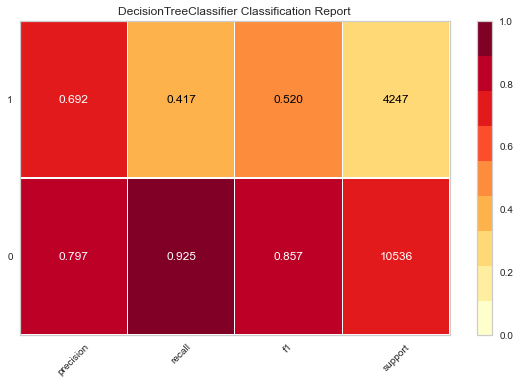

In [52]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(clf, support=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)    
visualizer.show()          

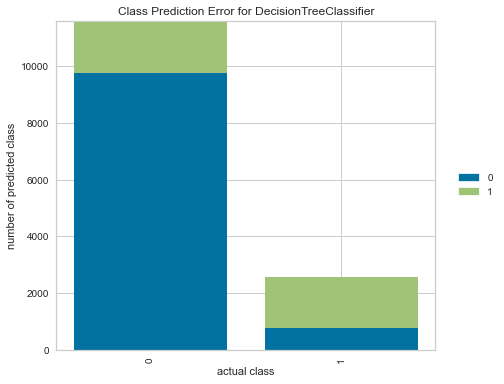

In [53]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import class_prediction_error

#visualizer = ClassPredictionError(clf, support=True)
#visualizer.fit(X_train, y_train) 
#visualizer.score(X_test, y_test)    
#visualizer.show()

class_prediction_error(clf, X_train, y_train, X_test, y_test)
plt.show()

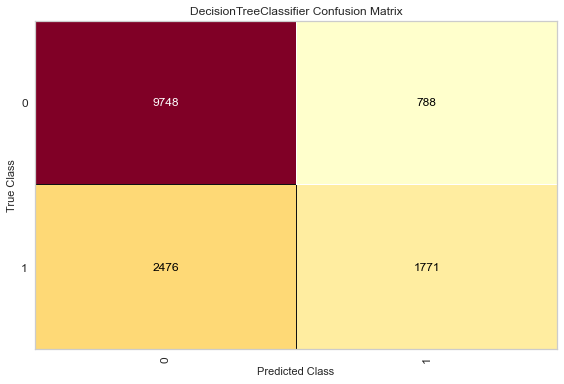

In [54]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix(clf, X_train, y_train, X_test, y_test)
plt.show()

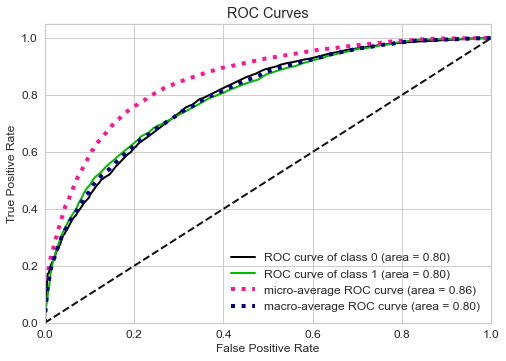

In [55]:
plot_roc(y_test, y_score)
plt.show()

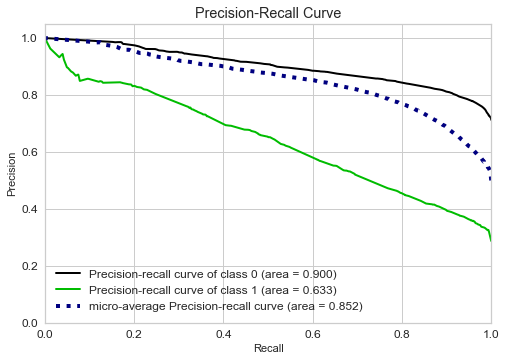

In [56]:
plot_precision_recall(y_test, y_score)
plt.show()

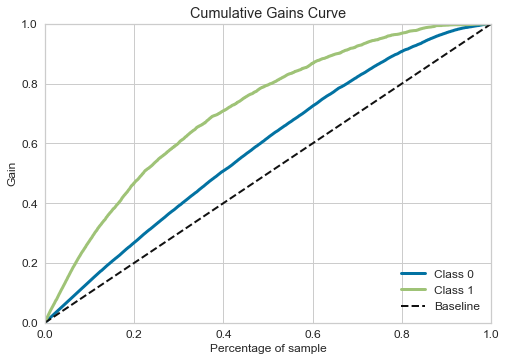

In [57]:
plot_cumulative_gain(y_test, y_score)
plt.show()

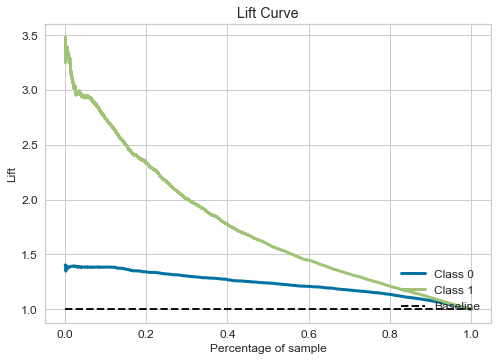

In [58]:
plot_lift_curve(y_test, y_score)
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

param_grid = {'max_depth': [None] + [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100]
         }

#old param
#param_grid = {'max_depth': [None] + list(range(60, 181, 10)),
#              'min_samples_split': [30, 40, 50, 70, 100, 200, 500],
#              'min_samples_leaf': range(1, 102, 10),
#             }

#combinations = list(ParameterGrid(param_grid)) #all combinations

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [40, 50, 60, 70, 100]},
             scoring='accuracy', verbose=10)

In [62]:
report(grid_search.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.780 (std: 0.005)
Parameters: {'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 60}

Model with rank: 2
Mean validation score: 0.779 (std: 0.006)
Parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 60}

Model with rank: 3
Mean validation score: 0.779 (std: 0.006)
Parameters: {'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 50}

Model with rank: 4
Mean validation score: 0.779 (std: 0.006)
Parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 50}

Model with rank: 5
Mean validation score: 0.779 (std: 0.007)
Parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 40}



In [35]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_list = {'max_depth': [None] + list(np.arange(2, 40, 2)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=10, n_jobs=-1, verbose=10, scoring='accuracy')
random_search.fit(X, y)
report(random_search.cv_results_, n_top=3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:   16.0s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:   17.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   19.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.2s finished


Model with rank: 1
Mean validation score: 0.499 (std: 0.029)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 12}

Model with rank: 2
Mean validation score: 0.498 (std: 0.030)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 22}

Model with rank: 3
Mean validation score: 0.497 (std: 0.027)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 30, 'max_depth': 10}



In [134]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=attributes) 
graph = graphviz.Source(dot_data) 


graph.render() 

'Source.gv.pdf'

In [22]:
def trasformaLista(stringa):
    result = list()
    tmp = stringa[1 : len(stringa)-1]
    
    splitted = tmp.split(", ")
    
    for s in splitted:
        result.append(s)
    
    return result


tmp = list();

for index in tqdm(df.index):
    #print(df[df.index == index].TRACK_genres.iloc[0])
    daTrasformare = df[df.index == index].TRACK_genres_soloTop.iloc[0]
    try:
        tmp.append(trasformaLista(daTrasformare))
    except:
        tmp.append(np.NaN)
    
df["TRACK_genres_soloTop"] = tmp

In [144]:
d = dict(); #migliore: 37
for i in tqdm(range(1, 10000, 1000)):
    clf = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    clf.fit(X_train, y_train)

    y_pred0 = clf.predict(X_test)

    d[i] = accuracy_score(y_test, y_pred0)

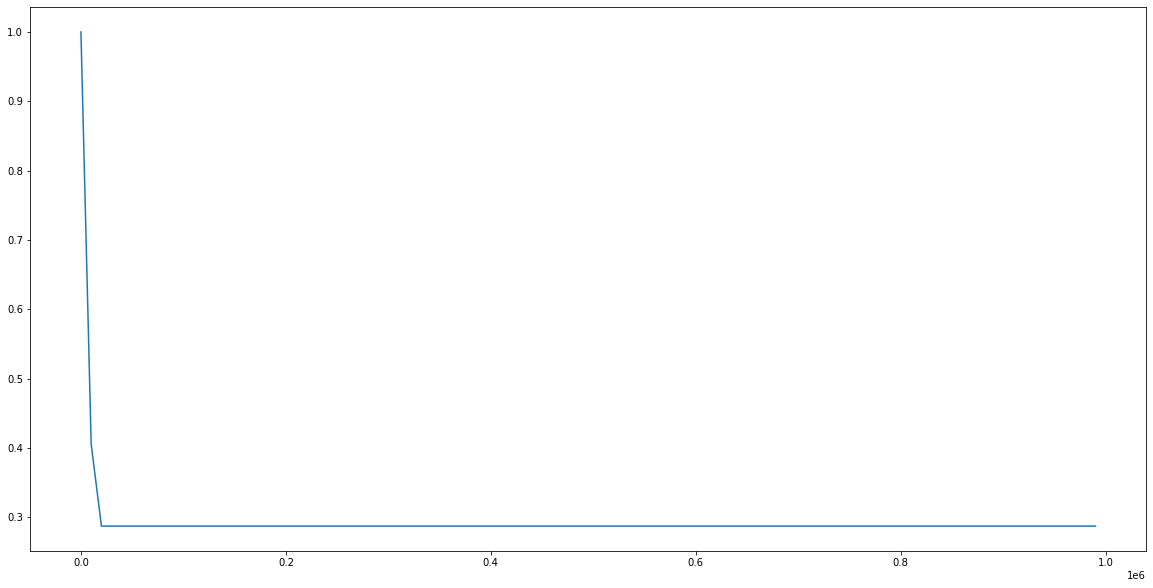

In [145]:
lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

# KNN

In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
tutti = list(df.columns)

compl = Diff(tutti, bitmap + nulli + nonNumerici + ["ALBUM_type_"])

In [65]:
class_name = 'Rock'
attributes = Diff(compl, list(["Rock","TRACK_genre_top"]))

df2 = df[df.TRACK_genre_top.isna() == False]

X = df2[attributes].values
y = df2[class_name]

minmax = MinMaxScaler()
X = minmax.fit_transform(X)

#robust = RobustScaler()
#X = robust.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [66]:
clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8576067104106068
F1-score [0.89933528 0.75678798]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     10536
           1       0.74      0.77      0.76      4247

    accuracy                           0.86     14783
   macro avg       0.82      0.83      0.83     14783
weighted avg       0.86      0.86      0.86     14783



In [29]:
parameters = {'n_neighbors': np.arange(1, 10 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters, verbose=10, n_jobs=-1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  2.3min remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             verbose=10)

In [32]:
report(search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.494 (std: 0.001)
Parameters: {'n_neighbors': 9, 'weights': 'distance'}

Model with rank: 2
Mean validation score: 0.494 (std: 0.003)
Parameters: {'n_neighbors': 10, 'weights': 'distance'}

Model with rank: 3
Mean validation score: 0.492 (std: 0.003)
Parameters: {'n_neighbors': 8, 'weights': 'distance'}



In [67]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [68]:
clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8576067104106068
F1-score [0.89933528 0.75678798]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     10536
           1       0.74      0.77      0.76      4247

    accuracy                           0.86     14783
   macro avg       0.82      0.83      0.83     14783
weighted avg       0.86      0.86      0.86     14783



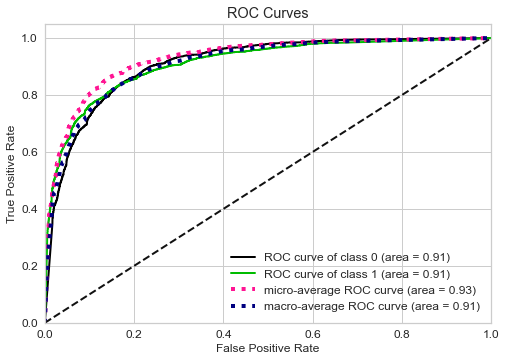

In [69]:
plot_roc(y_test, y_score)
plt.show()

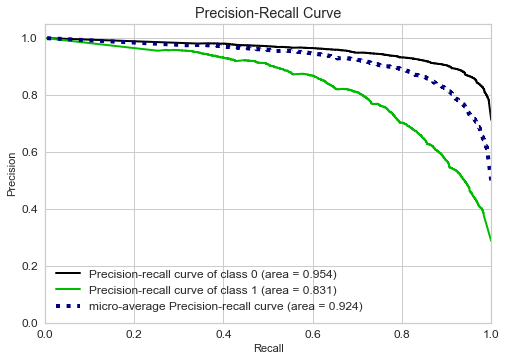

In [70]:
plot_precision_recall(y_test, y_score)
plt.show()

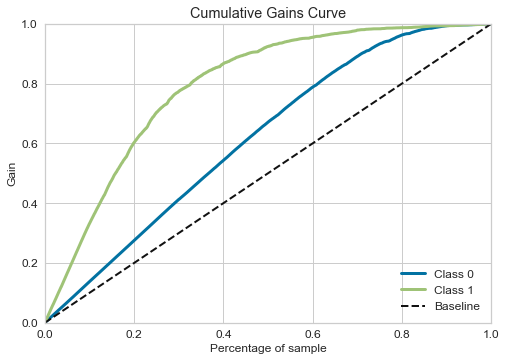

In [71]:
plot_cumulative_gain(y_test, y_score)
plt.show()

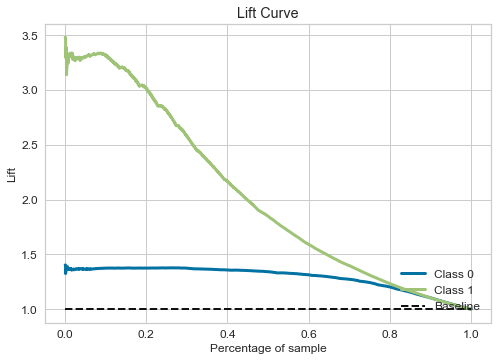

In [72]:
plot_lift_curve(y_test, y_score)
plt.show()

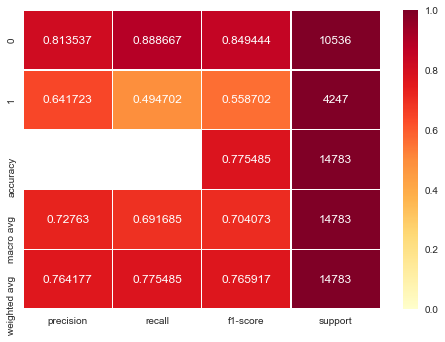

In [16]:
#mask = np.zeros((19, 4))
#mask[:,3] = True
#mask

clf_report = classification_report(y_test, y_pred0, output_dict=True)
accuracy=clf_report["accuracy"]
d = dict({"accuracy":{"f1-score":clf_report["accuracy"],
                    "support":clf_report["macro avg"]["support"]
                   }
       })
clf_report.update(d)
clf_report = pd.DataFrame(clf_report).T

sns.heatmap(clf_report, vmin=0, vmax=1, cmap='YlOrRd',fmt='g',linewidths=.3, annot=True)